<h1>Loading data</h1>

Required libraries

In [1]:
import pandas as pd
from statsmodels import robust

Load spreadsheet containing 2021 Ontario Sunshine List.

In [2]:
df = pd.read_csv('2021_sunshine.csv')
df.head()

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
0,Colleges,Aarts,Cheri,115618.46,74.25,Fanshawe College Of Applied Arts and Technology,Professor,2021,0
1,Colleges,Aaslepp,Drew,114506.79,124.66,Humber College Institute Of Technology and Adv...,Professor,2021,1
2,Colleges,Abba,Corinne,106770.74,124.45,George Brown College Of Applied Arts and Techn...,Librarian,2021,2
3,Colleges,Abbott,Brian,107378.44,124.61,Conestoga College Institute Of Technology and ...,Professor,2021,3
4,Colleges,Abbott,Kathleen,162873.26,428.40,George Brown College Of Applied Arts and Techn...,"Associate Dean, Centre for Continuous Learning",2021,4


244,390 candidates in data set.

In [3]:
df.shape

(244390, 9)

Data already clean: free of missing values in all columns.

In [4]:
df.isna().sum()

Sector        0
Last Name     0
First Name    0
Salary        0
Benefits      0
Employer      0
Job Title     0
Year          0
_docID        0
dtype: int64

<h1>Examining Salary</h1>

Distribution of salary values: **long right-tail with majority of salaries under $200,000.** Use of medians may be advised over means as averages of central tendency.

<AxesSubplot:title={'center':'Distribution of Salary Values in the 2021 Ontario Sunshine List'}, ylabel='Frequency'>

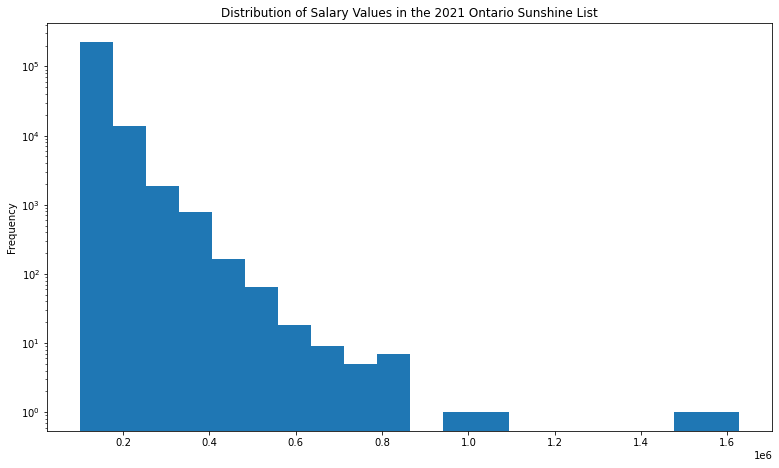

In [6]:
df['Salary'].plot.hist(
    bins=20,
    logy=True,
    title='Distribution of Salary Values in the 2021 Ontario Sunshine List',
    xlabel='Salary Value in Millions of Canadian Dollars',
    figsize=(13,7.5))

<h1>Examining Sectors</h1>

**Sectors with the largest number of candidates**

Smallest sectors, those with less than 500 list candidates, removed for clarity of figure. More than three-quarters of the employees listed were found in **education (schools, universities, and colleges), municipalities, and health.**

<AxesSubplot:title={'center':'Proportion of 2021 Ontario Sunshine List Candidates by Sector'}, ylabel='Sector'>

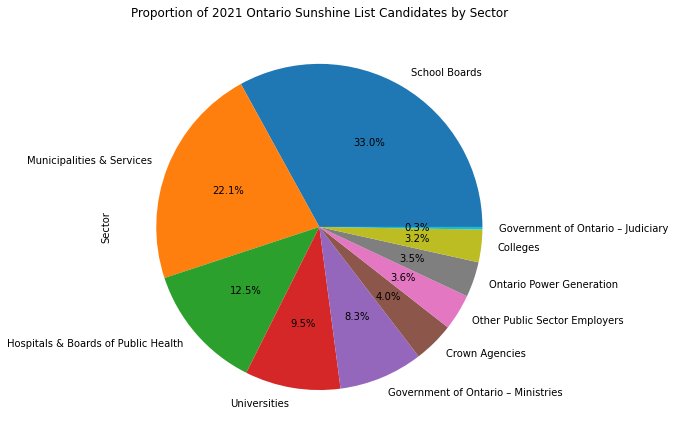

In [7]:
sectors = df['Sector'].value_counts()

sectors[sectors > 500].plot.pie(
    autopct='%1.1f%%',
    startangle=0,
    title='Proportion of 2021 Ontario Sunshine List Candidates by Sector', 
    figsize=(13,7.5))

Sectors not included in the pie chart above were legislative employees and those on secondments.

In [8]:
sectors[sectors < 500]

Government of Ontario – Legislative Assembly and Offices    424
Seconded (Education)                                        100
Seconded (Solicitor General)                                 28
Seconded (Children, Community and Social Services)            6
Seconded (Health)                                             5
Seconded (Attorney General)                                   2
Seconded (Cabinet Office)                                     1
Name: Sector, dtype: int64

**Sectors by highest median salary**

Aside from the single secondment to a Cabinet Office, sectors with the **top 5 highest pay on average were the judiciary, universities, Ontario Power Generation, health, and the legislature.** Note how the median absolute deviations (MADs, a measure of spread for the median) increase with average pay, suggesting more unequal distributions due to more varied payscales.

<AxesSubplot:title={'center':'2021 Ontario Sunshine List Sectors by Median Salary'}, xlabel='Sector'>

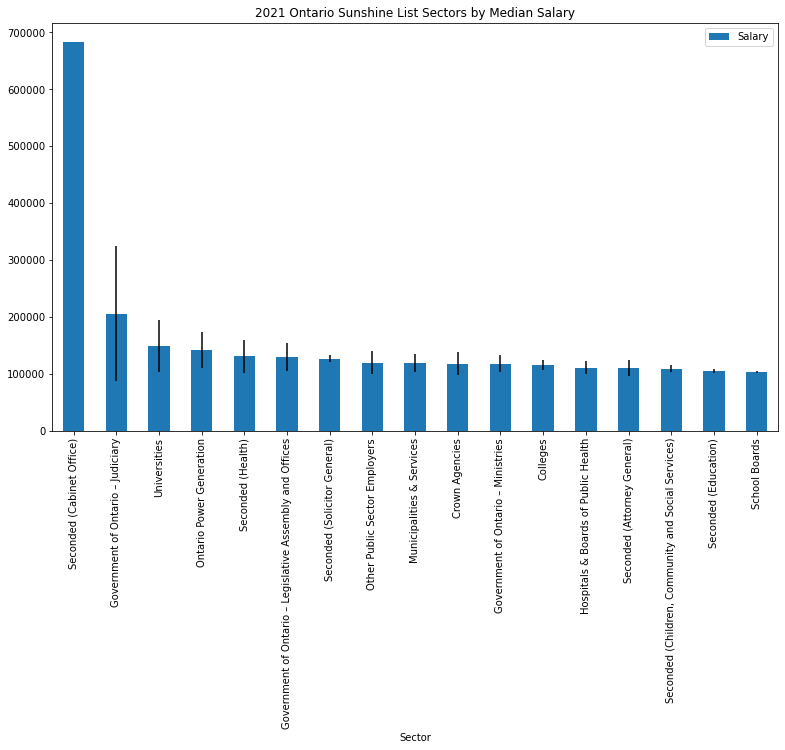

In [9]:
smed = df.groupby('Sector', as_index=False)['Salary'].median()
smed.sort_values(by='Salary', ascending=False, inplace=True)

serr = df.groupby('Sector')['Salary'].apply(robust.mad)

smed.plot.bar(
    'Sector', 
    'Salary', 
    yerr = serr,
    title='2021 Ontario Sunshine List Sectors by Median Salary',
    figsize=(13,7.5))

<h1>Examining Job Titles</h1>

38,401 distinct job titles found in the list.

In [10]:
len(df['Job Title'].unique())

38401

**Titles with the most candidates**

Job titles with the most list candidates were **teachers, nurses, professors, police, and firefighters.** This echoes the earlier finding that the largest represented sectors were education, health, and municipalities.

<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Job Titles by Count'}>

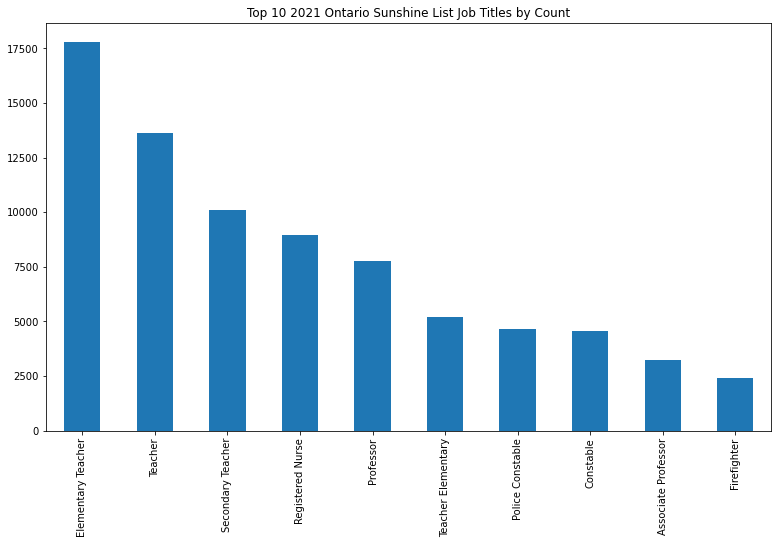

In [11]:
mosttitles = df['Job Title'].value_counts().head(10)

mosttitles.plot.bar(
    title='Top 10 2021 Ontario Sunshine List Job Titles by Count',
    figsize=(13,7.5))

**Specializations with the highest average pay**

"Specialization" is used here to refer to positions with more than 10 list candidates. This cutoff was chosen to exclude top leadership positions such as presidents and executives in favor of technical professions.

The top specialized job titles by pay were in **health, universities, and the judiciary**, in line with the previous of graph of highest paying sectors. Judges provide an example of a title with a rigid payscale, having a MAD of zero which contrasts other positions such as radiologists.

<ipython-input-19-0a5882a5447a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moretitles = df.groupby('Job Title')['Job Title', 'Salary']\


<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Job Titles by Salary'}, xlabel='Job Title'>

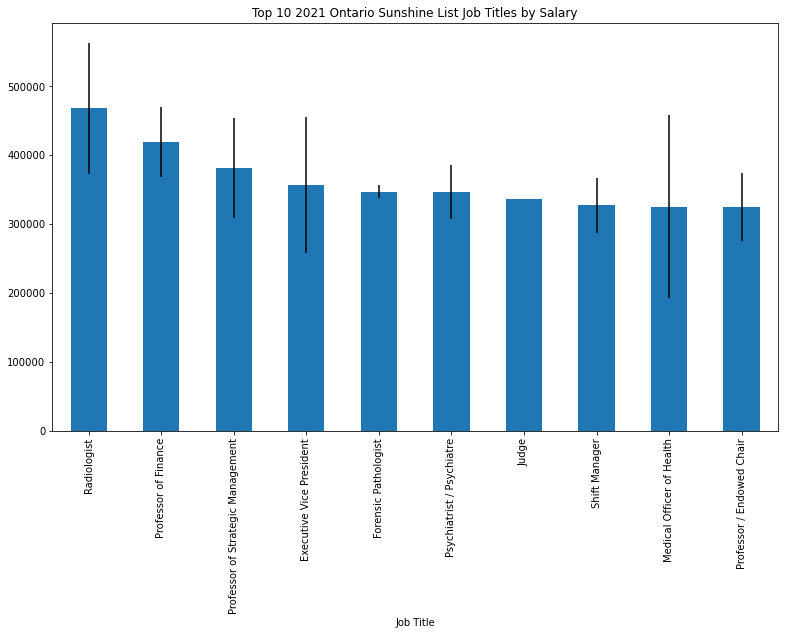

In [19]:
#Filter out rows that have job titles which are under the candidate number threshold
moretitles = df.groupby('Job Title')['Job Title', 'Salary']\
    .filter(lambda x: len(x) > 10)

#Calculate medians and MADs for top 10 highest-paying titles
toptitles = moretitles.groupby('Job Title')['Salary']\
    .median().sort_values(ascending=False).head(10)

terr = moretitles.groupby('Job Title')['Salary'].apply(robust.mad)

toptitles.plot.bar(
    yerr=terr,
    title='Top 10 2021 Ontario Sunshine List Job Titles by Salary',
    figsize=(13,7.5))

<h1>Examining Employers</h1>

2,115 distinct employers found in the data set.

In [21]:
len(df['Employer'].unique())

2115

**Employers with the most candidates**

Due to the population and tax base concentration, **organizations in the Greater Toronto Area (GTA) employ the most list candidates, along with the Ontario Provincial Police and Ontario Power Generation.** GTA municipal school boards are well represented. Toronto, as Ontario's most populous city, is included along with its police and university.

<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Job Employers by Candidate Count'}>

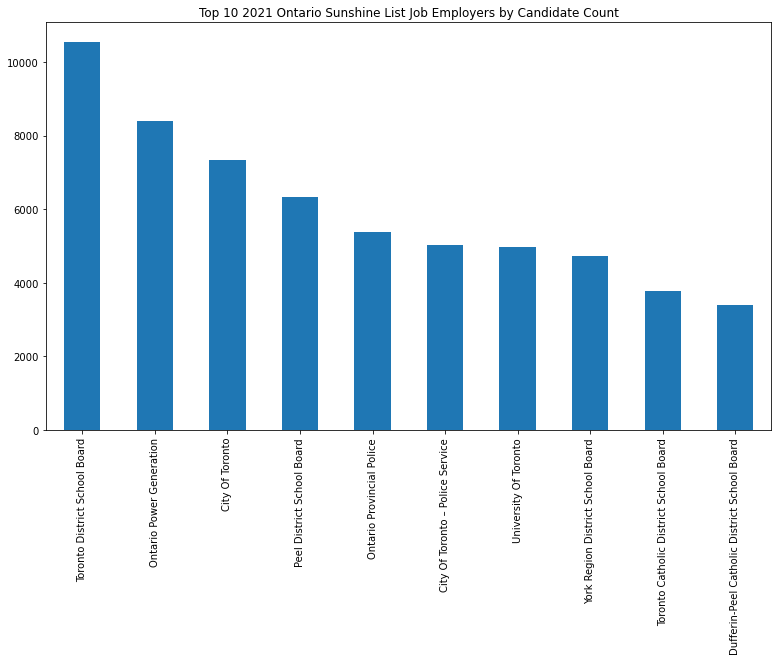

In [22]:
mostemployers = df['Employer'].value_counts().head(10)

mostemployers.plot.bar(
    title='Top 10 2021 Ontario Sunshine List Job Employers by Candidate Count',
    figsize=(13,7.5))

**Employers with the highest pay**

The candidate cutoff of 10 was used again to select employers with more list candidates, demonstrating a pattern of sufficiently high salaries on a significant level.

Due to candidates having different positions (and thus, different salaries) within an employer, MAD values are quite higher than with the job title analysis. **Health organizations and the judiciary made up the majority, along with the University of Sudbury, Kids Help Phone, and Toronto Convention and Visitors Association.** Note the MAD of zero on Superior Court due to all the list candidates being Judges, unlike the other judicial organizations that had different positions. The health centres listed are considered "Other Public Sector Employers" distinct from "Hospitals & Boards

<ipython-input-44-349c01fb84e2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moreemployers = df.groupby('Employer')['Employer', 'Salary']\


<AxesSubplot:title={'center':'Top 10 2021 Ontario Sunshine List Employers by Salary'}, xlabel='Employer'>

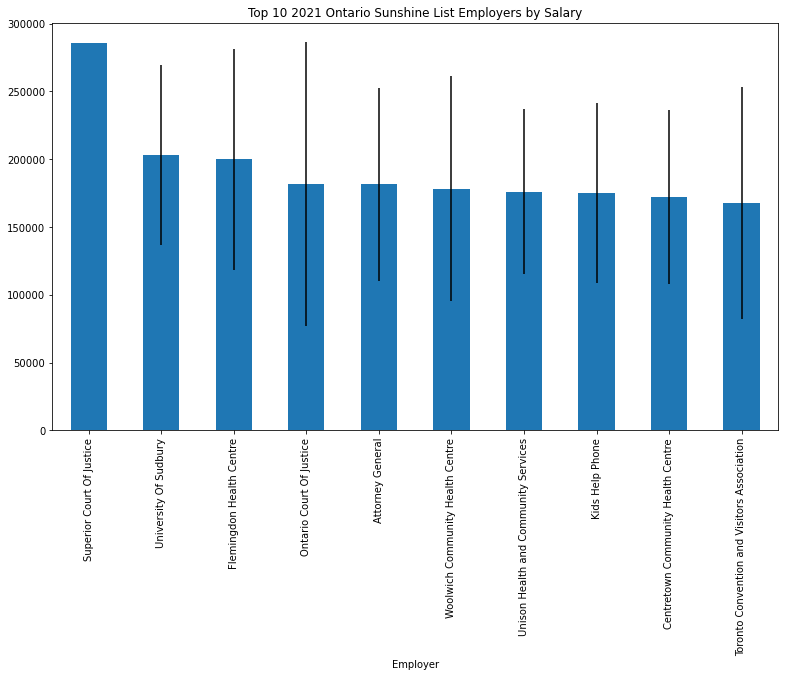

In [44]:
#Filter out rows that have employers which have less than 10 list candidates
moreemployers = df.groupby('Employer')['Employer', 'Salary']\
    .filter(lambda x: len(x) > 10)

#Calculate medians and MADs for top 10 highest-paying titles
topemployers = moreemployers.groupby('Employer')['Salary']\
    .median().sort_values(ascending=False).head(10)

eerr = moreemployers.groupby('Employer')['Salary'].apply(robust.mad)

topemployers.plot.bar(
    yerr=eerr,
    title='Top 10 2021 Ontario Sunshine List Employers by Salary',
    figsize=(13,7.5))

<h1>Testing cells</h1>

In [46]:
df[df['Employer'] == 'Toronto Convention and Visitors Association']

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
132506,Other Public Sector Employers,Beck,Scott,446169.23,1349.76,Toronto Convention and Visitors Association,President and Chief Executive Officer,2021,132506
132956,Other Public Sector Employers,Bruton,Linda,109999.92,584.40,Toronto Convention and Visitors Association,"Director, Destination Services",2021,132956
134011,Other Public Sector Employers,Donaghey,Meredith,104703.85,578.64,Toronto Convention and Visitors Association,Sales Director,2021,134011
134360,Other Public Sector Employers,Fazzolari,Rocco,229555.60,395.52,Toronto Convention and Visitors Association,"Vice-President, Finance and Administration",2021,134360
134867,Other Public Sector Employers,Gordon,Tara,223401.36,1349.76,Toronto Convention and Visitors Association,"Senior Vice-President, Global Sales and Services",2021,134867
135619,Other Public Sector Employers,Jarvis,Sarah,120081.83,619.20,Toronto Convention and Visitors Association,"Director, Partnerships",2021,135619
136560,Other Public Sector Employers,Longo,Roseanne,167602.24,1246.92,Toronto Convention and Visitors Association,"Vice-President, Travel Trade Sales",2021,136560
136837,Other Public Sector Employers,Mamela,Jonathan,240657.92,1349.76,Toronto Convention and Visitors Association,"Executive Vice-President, Chief Marketing Officer",2021,136837
137680,Other Public Sector Employers,Neale,Heather,189093.97,619.20,Toronto Convention and Visitors Association,Managing Director of Sales,2021,137680
137749,Other Public Sector Employers,Nikolov,Sophia,111989.63,11.74,Toronto Convention and Visitors Association,Account Director,2021,137749


In [41]:
moreemployers = df.groupby('Employer')['Employer', 'Salary'].filter(lambda x: len(x) > 10)

moreemployers.groupby('Employer')['Salary'].median().sort_values(ascending=False).head(10)

<ipython-input-41-8578456227c1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moreemployers = df.groupby('Employer')['Employer', 'Salary'].filter(lambda x: len(x) > 10)


Employer
Superior Court Of Justice                      285719.230
University Of Sudbury                          202829.770
Flemingdon Health Centre                       200040.740
Ontario Court Of Justice                       181593.975
Attorney General                               181511.455
Woolwich Community Health Centre               178085.980
Unison Health and Community Services           176070.575
Kids Help Phone                                175102.940
Centretown Community Health Centre             172289.260
Toronto Convention and Visitors Association    167602.240
Name: Salary, dtype: float64